# Working with the Fitbit API

First things first, all credit to [Michael Galarnyk](https://towardsdatascience.com/using-the-fitbit-web-api-with-python-f29f119621ea)

### Getting the imports right for Sphinx 

In [13]:
import sys, os, pathlib
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

ROOT_DIR = str(pathlib.Path(os.path.realpath("__file__")).parents[2])
sys.path.insert(0, ROOT_DIR)

from hfkpy.fitbit.get_data import client


### Grab the tokens

In [14]:
token_path = pathlib.Path(ROOT_DIR) / "tokens.csv"
tokens = pd.read_csv(token_path)


### Instantiate the Fitbit API client

In [ ]:
auth2_client = client(tokens)


### Intraday Fitbit data

The [intraday Fitbit data](https://dev.fitbit.com/build/reference/web-api/intraday/get-activity-intraday-by-date/) can be collected down to the second interval. This data includes calories | distance | elevation | floors | steps. To get multiple days of data we can pull intraday and concatenate over our date range of interest.

In [16]:
oneDate = datetime(year=2022, month=4, day=7)

oneDayData = auth2_client.intraday_time_series(
    "activities/heart", oneDate, detail_level="1min"
)

str(oneDayData)[:200] + "..."


"{'activities-heart': [{'dateTime': '2022-04-07', 'value': {'customHeartRateZones': [], 'heartRateZones': [{'caloriesOut': 2876.27486, 'max': 111, 'min': 30, 'minutes': 1405, 'name': 'Out of Range'}, {..."

#### View the data as a dataframe

In [17]:
heart_df = pd.DataFrame(oneDayData["activities-heart-intraday"]["dataset"])
heart_df.head()


,time,value
0,00:00:00,66
1,00:01:00,62
2,00:02:00,70
3,00:03:00,68
4,00:04:00,63


#### Visualize the data

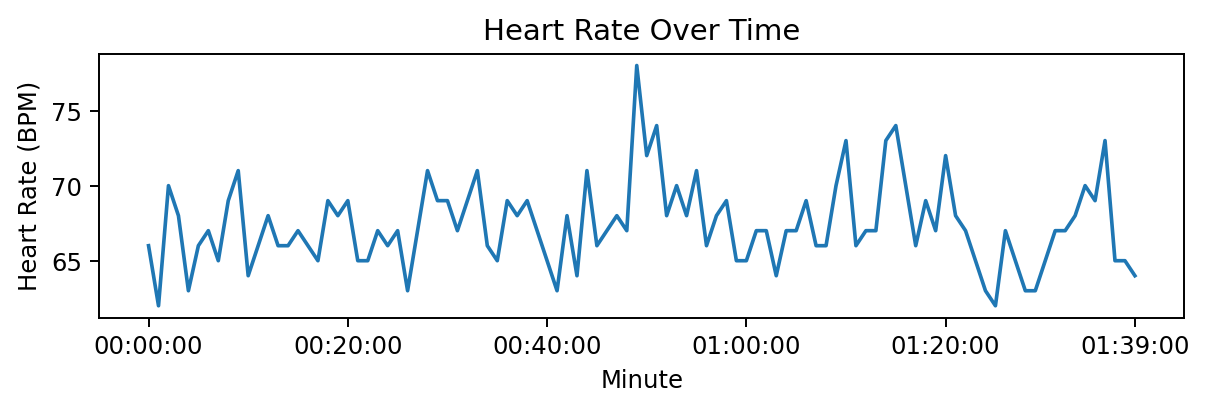

In [18]:
plot_data = heart_df.head(100)
x_ticks = [0, 20, 40, 60, 80, 99]
x_tick_labels = plot_data.iloc[x_ticks]["time"]
plt.figure(figsize=(8, 2), dpi=175)
sns.lineplot(data=heart_df.head(100), x="time", y="value")
plt.xticks(x_ticks, x_tick_labels)
plt.xlabel("Minute")
plt.ylabel("Heart Rate (BPM)")
plt.title("Heart Rate Over Time")
plt.show()
